In [0]:
from tensorflow import keras
import tensorflow as tf

from keras import layers
from keras import models
from keras import optimizers

import matplotlib.pylab as plt
import numpy as np

from google.colab import drive
import os

Using TensorFlow backend.


In [0]:
if os.path.exists('/content/gdrive/')==False:
  drive.mount('/content/gdrive')
  print('Google drive is mounted\n')
else:
  print('Google drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google drive is mounted



In [0]:
from keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1/255)

In [0]:
train_path = '/content/gdrive/My Drive/food_an'
val_path = '/content/gdrive/My Drive/food_test/val_set'

train_dir = str(train_path)
val_dir = str(val_path)

In [0]:
image_size = 224
train_batchsize = 100
val_batchsize = 10

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(image_size,image_size),
                                                  batch_size=train_batchsize,
                                                  class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(image_size,image_size),
                                                    batch_size=val_batchsize,
                                                    shuffle=True)

Found 83952 images belonging to 93 classes.
Found 9367 images belonging to 93 classes.


In [0]:
classes = 93
dense = densenet.DenseNet201(weights='imagenet',input_shape=(image_size,image_size,3), include_top=False)

W0622 12:00:36.709395 139677719410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 12:00:36.749493 139677719410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 12:00:36.762931 139677719410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 12:00:36.800498 139677719410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0622 12:00:36.801442 1396777194

74842112/74836368 [==============================] - 1s 0us/step


In [0]:
for layer in dense.layers[:-2]:
  layer.trainable = False
  
for layer in dense.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f08f4c660f0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f08f4c66240> False
<keras.layers.convolutional.Conv2D object at 0x7f08f4c66518> False
<keras.layers.normalization.BatchNormalization object at 0x7f08f4c66a20> False
<keras.layers.core.Activation object at 0x7f08f7ada940> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f08f6a87630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f08f6519320> False
<keras.layers.normalization.BatchNormalization object at 0x7f08f4c66f60> False
<keras.layers.core.Activation object at 0x7f08f64fea20> False
<keras.layers.convolutional.Conv2D object at 0x7f08f6516400> False
<keras.layers.normalization.BatchNormalization object at 0x7f08e67aff28> False
<keras.layers.core.Activation object at 0x7f08e6770828> False
<keras.layers.convolutional.Conv2D object at 0x7f08e6709be0> False
<keras.layers.merge.Concatenate object at 0x7f08e66a1fd0> False
<keras.layers.normalization.

In [0]:
model = models.Sequential()

model.add(dense)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 7, 7, 1920)        18321984  
Total params: 18,321,984
Trainable params: 3,840
Non-trainable params: 18,318,144
_________________________________________________________________


In [0]:
model.add(layers.AveragePooling2D(padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(classes, activation='softmax'))
model.summary()

W0622 12:01:24.846244 139677719410560 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 7, 7, 1920)        18321984  
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 1920)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              31458304  
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
__________

In [0]:
import tensorflow.keras.backend as K
sess = K.get_session()
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
model.compile(
  optimizer=optimizers.RMSprop(lr=0.01), 
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    
reducelr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=1)
    
batch_stats = CollectBatchStats()
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/My Drive/weights.hdf5', verbose=1, save_best_only=True)

In [0]:
board = tf.keras.callbacks.TensorBoard(log_dir='/content/gdrive/My Drive/tensorboard/logs',
                            histogram_freq=0,
                            batch_size=32, 
                            write_graph=True, 
                            write_grads=False, 
                            write_images=False, 
                            embeddings_freq=0, 
                            embeddings_layer_names=None, 
                            embeddings_metadata=None, 
                            embeddings_data=None, 
                            update_freq='epoch')

In [0]:

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=32,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples/validation_generator.batch_size,
                              verbose=1,
                              callbacks=[batch_stats, checkpointer, board])

Epoch 1/32
 80/100 [=======================>......] - ETA: 10:01 - loss: 3.3643 - acc: 0.2487

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1078 bytes but only got 0. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 125 bytes but only got 120. Skipping tag 37510
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag))


 81/100 [=======================>......] - ETA: 9:31 - loss: 3.3602 - acc: 0.2490 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 99/100 [============================>.] - ETA: 30s - loss: 3.2753 - acc: 0.2565 

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 37386
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 37396
  " Skipping tag %s" % (size, len(data), tag))


100/100 [==============================] - 3135s 31s/step - loss: 3.2715 - acc: 0.2568 - val_loss: 15.6849 - val_acc: 0.0186

Epoch 00001: val_loss improved from 15.93970 to 15.68492, saving model to /content/gdrive/My Drive/weights.hdf5
Epoch 2/32
100/100 [==============================] - 3075s 31s/step - loss: 2.6738 - acc: 0.3247 - val_loss: 15.8320 - val_acc: 0.0147

Epoch 00002: val_loss did not improve from 15.68492
Epoch 3/32
100/100 [==============================] - 3047s 30s/step - loss: 2.4379 - acc: 0.3604 - val_loss: 15.8806 - val_acc: 0.0124

Epoch 00003: val_loss did not improve from 15.68492
Epoch 4/32
 70/100 [====================>.........] - ETA: 14:06 - loss: 2.3045 - acc: 0.3870

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4718592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4456448 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4980736 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to rea

100/100 [==============================] - 2956s 30s/step - loss: 2.2891 - acc: 0.3888 - val_loss: 15.9018 - val_acc: 0.0121

Epoch 00004: val_loss did not improve from 15.68492
Epoch 5/32
100/100 [==============================] - 2918s 29s/step - loss: 2.2075 - acc: 0.4047 - val_loss: 15.9335 - val_acc: 0.0112

Epoch 00005: val_loss did not improve from 15.68492
Epoch 6/32
 84/100 [========================>.....] - ETA: 7:12 - loss: 2.1308 - acc: 0.4214

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 6. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))


100/100 [==============================] - 2839s 28s/step - loss: 2.1306 - acc: 0.4243 - val_loss: 15.9454 - val_acc: 0.0101

Epoch 00006: val_loss did not improve from 15.68492
Epoch 7/32
100/100 [==============================] - 2570s 26s/step - loss: 2.1237 - acc: 0.4269 - val_loss: 15.9369 - val_acc: 0.0110

Epoch 00007: val_loss did not improve from 15.68492
Epoch 8/32
100/100 [==============================] - 304s 3s/step - loss: 2.0207 - acc: 0.4545 - val_loss: 15.9111 - val_acc: 0.0125

Epoch 00008: val_loss did not improve from 15.68492
Epoch 9/32
100/100 [==============================] - 304s 3s/step - loss: 1.9976 - acc: 0.4629 - val_loss: 15.9055 - val_acc: 0.0128

Epoch 00009: val_loss did not improve from 15.68492
Epoch 10/32
100/100 [==============================] - 304s 3s/step - loss: 1.9945 - acc: 0.4566 - val_loss: 15.9327 - val_acc: 0.0114

Epoch 00010: val_loss did not improve from 15.68492
Epoch 11/32
100/100 [==============================] - 305s 3s/step - l

AttributeError: ignored

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

In [0]:
import h5py
model.save('/content/gdrive/My Drive/save_file/densenet1.h5')

In [0]:
model2 = keras.models.load_model('/content/gdrive/My Drive/save_file/densenet1.h5')
model2.summary()

W0623 04:21:09.754937 139708601563008 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 7, 7, 1920)        18321984  
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 1920)        7680      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 1920)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              31458304  
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

In [0]:
print(model2.get_weights())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
model2 = keras.models.load_model('/content/gdrive/My Drive/save_file/densenet2.h5')
model2.summary()

image = '/content/gdrive/My Drive/food_an/갈비구이/Img_000_0000.jpg의 사본'


x = keras.preprocessing.image.load_img(image, target_size=(224,224))

x = keras.preprocessing.image.img_to_array(x)

x = np.expand_dims(x, axis=0)


result = model2.predict(x)


label_names = sorted(validation_generator.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names
labels_batch = label_names[np.argmax(result)]

print(labels_batch)


[[1.71582723e-32 0.00000000e+00 4.63944690e-35 7.03732268e-37
  1.48353768e-17 2.75905498e-28 2.40596837e-27 6.66535520e-19
  0.00000000e+00 5.66551200e-13 5.03754659e-22 1.01406760e-04
  1.21717039e-28 4.64639320e-26 0.00000000e+00 0.00000000e+00
  1.71887959e-25 7.08794897e-36 3.51999291e-31 2.92925259e-23
  1.67217549e-05 1.93825702e-34 2.08793270e-29 1.32312666e-29
  0.00000000e+00 8.33283365e-37 1.53634340e-27 1.41931583e-25
  1.91807388e-34 1.56679756e-38 1.65025154e-33 1.85887258e-31
  1.14073252e-07 3.22373481e-18 3.53999502e-28 1.45231265e-35
  7.47759674e-23 6.70866622e-35 2.93664016e-28 0.00000000e+00
  9.95488226e-01 0.00000000e+00 3.75760968e-36 4.65775095e-26
  1.83161768e-31 7.49411398e-35 4.77579474e-27 5.34321721e-25
  2.08390165e-26 5.76178247e-28 3.91894991e-23 0.00000000e+00
  6.58654223e-35 0.00000000e+00 3.24366904e-18 3.55382363e-35
  1.30253830e-30 3.49642801e-30 1.73075285e-21 1.77815164e-24
  0.00000000e+00 0.00000000e+00 5.63573896e-30 1.86932762e-29
  1.4800

In [0]:
for image_batch,label_batch in validation_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break
  
label_names = sorted(validation_generator.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

Image batch shape:  (10, 224, 224, 3)
Labe batch shape:  (10, 93)


array(['간장게장', '갈비구이', '갈비찜', '갈비탕', '갈치구이',
       '갈치조림', '감자전', '감자조림', '감자탕', '계란국',
       '계란말이', '계란찜', '계란후라이', '고등어구이',
       '고등어조림', '고추튀김', '곰탕_설렁탕', '곱창구이',
       '곱창전골', '과메기', '김밥', '김치볶음밥', '김치전',
       '김치찌개', '김치찜', '꽁치조림', '누룽지', '닭갈비',
       '닭볶음탕', '동태찌개', '두부김치', '떡갈비', '떡꼬치',
       '떡볶이', '라면', '라볶이', '막국수', '만두', '매운탕',
       '멍게', '메추리알장조림', '물회', '보쌈', '북엇국',
       '불고기', '비빔냉면', '비빔밥', '산낙지', '삼겹살',
       '삼계탕', '새우볶음밥', '새우튀김', '생선전', '수육',
       '수제비', '순대', '알밥', '양념게장', '양념치킨',
       '열무국수', '오징어튀김', '유부초밥', '육개장', '육회',
       '잔치국수', '잡곡밥', '잡채', '장어구이', '장조림',
       '전복죽', '제ᄋ

In [0]:
result_batch = model2.predict(image_batch)

#print(model2.predict_classes(x))

labels_batch = label_names[np.argmax(result_batch, axis=-1)]
labels_batch

array(['과메기', '새우볶음밥', '김치볶음밥', '새우볶음밥',
       '코다리조림', '고등어구이', '갈비찜', '새우볶음밥', '라면',
       '육개장'], dtype='<U17')

과메기
새우볶음밥
김치볶음밥
새우볶음밥
코다리조림
고등어구이
갈비찜
새우볶음밥
라면
육개장


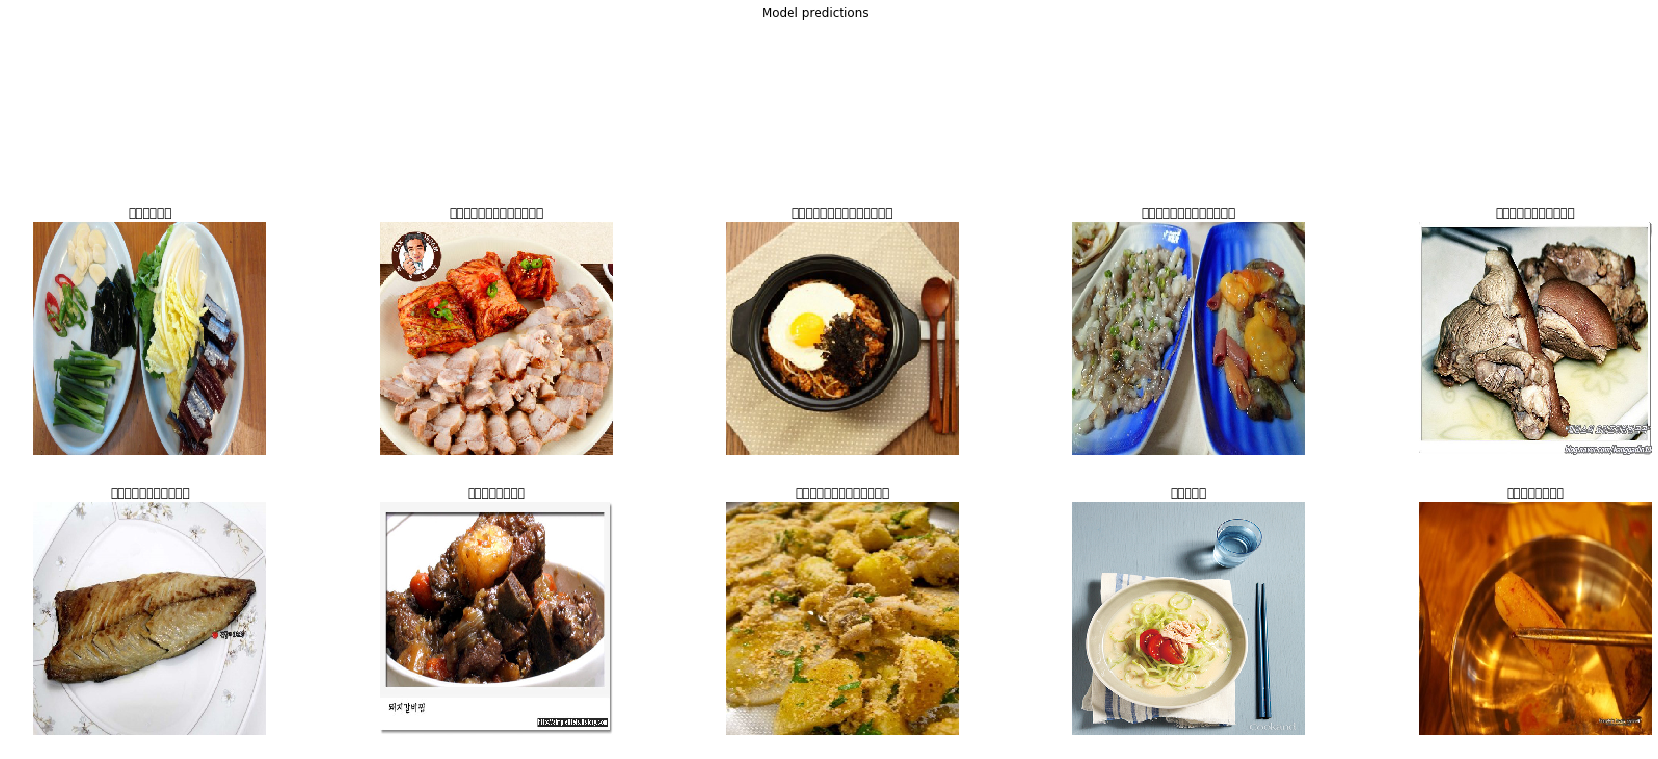

In [0]:
plt.figure(figsize=(30,30))
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  name = labels_batch[n]
  print(name)
  plt.title(name)
  plt.axis('off')
_ = plt.suptitle("Model predictions")